<a href="https://colab.research.google.com/github/SamuelSousaFerreira/Segmenta-o-de-CLientes-de-um-Banco/blob/main/Clustering_extraindo_padr%C3%B5es_dos_dados_Interpreta%C3%A7%C3%A3o_Cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Aula 2 - Obtendo os clusters**

In [ ]:
import pandas as pd

In [ ]:
dados = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/alura-clustering-validation/base-de-dados/CC%20GENERAL.csv')
dados.head()


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
dados.shape

(8950, 18)

In [ ]:
dados.info

<bound method DataFrame.info of      CUST_ID      BALANCE  ...  PRC_FULL_PAYMENT  TENURE
0     C10001    40.900749  ...          0.000000      12
1     C10002  3202.467416  ...          0.222222      12
2     C10003  2495.148862  ...          0.000000      12
3     C10004  1666.670542  ...          0.000000      12
4     C10005   817.714335  ...          0.000000      12
...      ...          ...  ...               ...     ...
8945  C19186    28.493517  ...          0.500000       6
8946  C19187    19.183215  ...          0.000000       6
8947  C19188    23.398673  ...          0.250000       6
8948  C19189    13.457564  ...          0.250000       6
8949  C19190   372.708075  ...          0.000000       6

[8950 rows x 18 columns]>

In [ ]:
dados.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


##**Organizando os dados**
Alguns atributos pouco acrescentam ao modelo, por exemplo, Id do client e Tenure.

> Eliminando colunas desnecessárias

> Tratando Valores Nulos

> Normalizando os dados



###**Eliminando colunas desnecessárias**


In [ ]:
dados.drop(columns=['CUST_ID', 'TENURE'], inplace=True)

dados.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000


In [ ]:
dados.shape

(8950, 16)

###**Tratando dados nulos**

In [ ]:
missing = dados.isna().sum()
missing

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
dtype: int64

Vamos substituir pela mediana o MINIMUM_PAYMENTS

In [ ]:
dados.fillna(dados.median(), inplace= True)
missing = dados.isna().sum()
missing

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
dtype: int64

###**Normalizando os dados**

In [ ]:
from sklearn.preprocessing import Normalizer

In [ ]:
values = Normalizer().fit_transform(dados.values)
values

array([[3.93555441e-02, 7.87271593e-04, 9.17958473e-02, ...,
        1.94178127e-01, 1.34239194e-01, 0.00000000e+00],
       [2.93875903e-01, 8.34231560e-05, 0.00000000e+00, ...,
        3.76516684e-01, 9.84037959e-02, 2.03923046e-05],
       [3.10798149e-01, 1.24560965e-04, 9.63068011e-02, ...,
        7.74852335e-02, 7.81351982e-02, 0.00000000e+00],
       ...,
       [2.27733092e-02, 8.11060955e-04, 1.40540698e-01, ...,
        7.90986945e-02, 8.02156174e-02, 2.43318384e-04],
       [2.65257948e-02, 1.64255731e-03, 0.00000000e+00, ...,
        1.03579625e-01, 1.09898221e-01, 4.92767391e-04],
       [1.86406219e-01, 3.33426837e-04, 5.46778061e-01, ...,
        3.15915455e-02, 4.41568390e-02, 0.00000000e+00]])

In [ ]:
colunas = dados.columns
values = pd.DataFrame(data=values, columns=colunas)
values

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,0.039356,0.000787,0.091796,0.000000,0.091796,0.000000,0.000160,0.000000,0.000080,0.000000,0.000000,0.001924,0.962221,0.194178,0.134239,0.000000
1,0.293876,0.000083,0.000000,0.000000,0.000000,0.591240,0.000000,0.000000,0.000000,0.000023,0.000367,0.000000,0.642358,0.376517,0.098404,0.000020
2,0.310798,0.000125,0.096307,0.096307,0.000000,0.000000,0.000125,0.000125,0.000000,0.000000,0.000000,0.001495,0.934207,0.077485,0.078135,0.000000
3,0.208887,0.000080,0.187872,0.187872,0.000000,0.025792,0.000010,0.000010,0.000000,0.000010,0.000125,0.000125,0.939988,0.000000,0.039147,0.000000
4,0.504298,0.000617,0.009867,0.009867,0.000000,0.000000,0.000051,0.000051,0.000000,0.000000,0.000000,0.000617,0.740060,0.418340,0.150967,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,0.025197,0.000884,0.257441,0.000000,0.257441,0.000000,0.000884,0.000000,0.000737,0.000000,0.000000,0.005306,0.884314,0.287928,0.043231,0.000442
8946,0.016485,0.000859,0.257811,0.000000,0.257811,0.000000,0.000859,0.000000,0.000716,0.000000,0.000000,0.005156,0.859370,0.237067,0.268419,0.000000
8947,0.022773,0.000811,0.140541,0.000000,0.140541,0.000000,0.000811,0.000000,0.000649,0.000000,0.000000,0.004866,0.973274,0.079099,0.080216,0.000243
8948,0.026526,0.001643,0.000000,0.000000,0.000000,0.072060,0.000000,0.000000,0.000000,0.000329,0.003942,0.000000,0.985535,0.103580,0.109898,0.000493


###**Executando o K Means**

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans= KMeans(n_clusters=5, n_init=10, max_iter=300) 
#n_init = 10 significa que o algoritmo tem q rodar 10 vezes e retornar o mesmo valor, 
#já que o KMean é ão determinístico e pode retornar valores diferentes

y_predi = kmeans.fit_predict(values)
y_predi

array([3, 1, 3, ..., 3, 3, 0], dtype=int32)

#**Aula 3 -** **Entendendo os Critérios e métricas de Validação**

Etapa importante que gera confiança para prosseguir com a análise e interpretação.

**Métricas externas** 
> Precisamos das labels pré-definidas para classificar, no caso não a temos.

**Métricas internas**
> Independe das labels, as que usaremos.

>>**Baseiam em critérios de Validação, com 2 principais**
1.  Compactação  - quão próximo estão os pontos dentro de um cluster, quanto mais próximo mais compacto ele está
2. Separação - Quão bem separados estão os pontos em clusters diferentes, quanto mais distantes os clusters um dos outros melhor, significa que estão nem definidos.

##**Critérios de Validação**

***Silhouete***
>**alfa**
>> distância média entre o ponto e todos os outros pontos do mesmo 

>**beta**
>> distãncia média entre o ponto e todos os outros pontos do cluster mais próximo

s = (b-a)/max(a,b)

##**Calculando o Silhouete**

In [ ]:
from sklearn import metrics

In [ ]:
labels = kmeans.labels_
silhouete = metrics.silhouette_score(values, labels, metric ='euclidean')
silhouete

0.3485292820452357

é um valor bom pois é >0, o silhouete vai de -1,1

#**Entendendo e Calculando o Índice Davies-Bouldin**

Medida de similaridade entre 2 clusters *i* e *j*, o quão similares eles são

DB = 1/k somatório(1:k) R*i* *j* = (s*i + s*j* )/ d *i* *j*

> s é a distância média entre cada ponto do cluster e seu centroide

> d é a distância entre os centróides dos clusters

**Quanto mais próximo de 0 melhor!**



In [ ]:
dbs = metrics.davies_bouldin_score(values, labels)
dbs

1.1527134855876944

#**Aula 5 - Entendendo e calculando o Índice Calinski Harabasz**

Leva em consideração a dispersão dos pontos dentro de um Cluster

 pesquisar a fórmula na net 

 **Quanto mais alto melhor.**

In [ ]:
calinski = metrics.calinski_harabasz_score(values, labels)
calinski

3422.8382083377455

#**Aula 6 - Validando os Clusters**

##**A validação relativa**

Comparamos com variação do próprio algoritmo.

Aqui variaremos o número de clusters, mas podemos alterar outros parâmetros.

In [ ]:
def clustering_algorithm(clusters,dataset):

  kmeans = KMeans(n_clusters=clusters,n_init=10, max_iter=100 )
  labels = kmeans.fit_predict(dataset)
  s= metrics.silhouette_score(dataset, labels, metric='euclidean')
  dbs = metrics.davies_bouldin_score(dataset, labels)
  calinski = metrics.calinski_harabasz_score(dataset, labels)

  return s, dbs, calinski



In [ ]:
s1, dbs1, calinski1 = clustering_algorithm(3, values)

print(s1, dbs1, calinski1)

0.32720635802730225 1.3096459277961872 3526.449625841575


In [ ]:
s5, dbs5, calinski5 = clustering_algorithm(5, values)

print(s5, dbs5, calinski5)

0.3645214224718617 1.0759751528893422 3431.793415753516


In [ ]:
s7, dbs7, calinski7 = clustering_algorithm(50, values)

print(s7, dbs7, calinski7)

0.24922760049874845 1.2151428077226576 1625.0884707936282


Usaremos n=5 onde o silhoet ficou melhor. O silhouet é o mais usado e aumentando o número de clusters os valores são bem piores.


##**A estrutura dos clusters**

Podemos comparar com uma classificação aleatória de forma a validar o nosso modelo que vale a pena.



In [ ]:
#gerando o conjunto aleatório de dados
import numpy as np
random_data = np.random.rand(8950,16)

In [ ]:
s, dbs, calinski = clustering_algorithm(5, random_data)
print(s,dbs,calinski)
print(s5, dbs5, calinski5)

0.040446449534051056 3.4523022916556805 304.1807931040278
0.3645214224718617 1.0759751528893422 3431.793415753516


##**A estabilidade dos clusters**

Vamos dividir a base de dados, rodar o Kmeans para as divisões e queremos que os resultados das métricas sejam similares.

In [ ]:
set1, set2, set3 = np.array_split(values,3)

s1, dbs1,calinski1 = clustering_algorithm(5,set1)
s2, dbs2,calinski2 = clustering_algorithm(5,set2)
s3, dbs3,calinski3 = clustering_algorithm(5,set3)

print(s1, dbs1, calinski1)
print(s2, dbs2, calinski2)
print(s3, dbs3, calinski3)

0.3709892317069683 1.0421931450476152 1200.2020718284073
0.3538037064965953 1.1394936582652306 1194.9486345538917
0.36713104970461446 1.099101412584505 1167.5075975296122


Evidência que o cluster é estável pois os valores são próximos.

#**Aula 7 - Visualizando os clusters**

##**Gerando gráficos**

Como há 16 dimensões não há como visualizá-las todas ao mesmo tempo graficamente. Por isso serão escolhidas duas para vermos no plano


Text(0, 0.5, 'Valor Total Gasto')

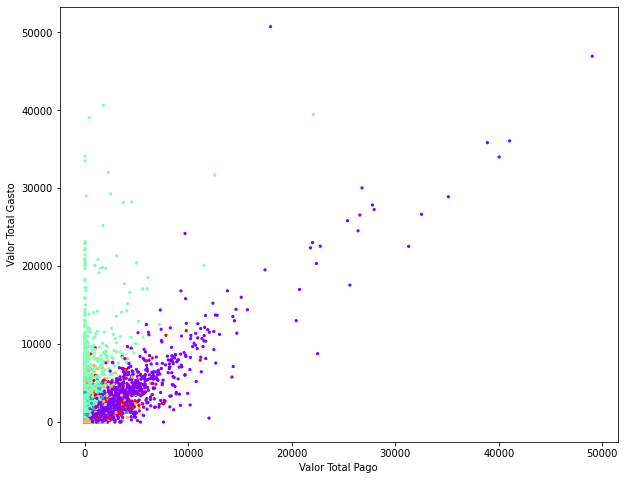

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.scatter(dados['PURCHASES'],dados['PAYMENTS'], c=labels,s=5,cmap='rainbow')
plt.xlabel('Valor Total Pago')
plt.ylabel('Valor Total Gasto')


In [ ]:
import seaborn as sns

In [ ]:
dados['cluster'] = labels

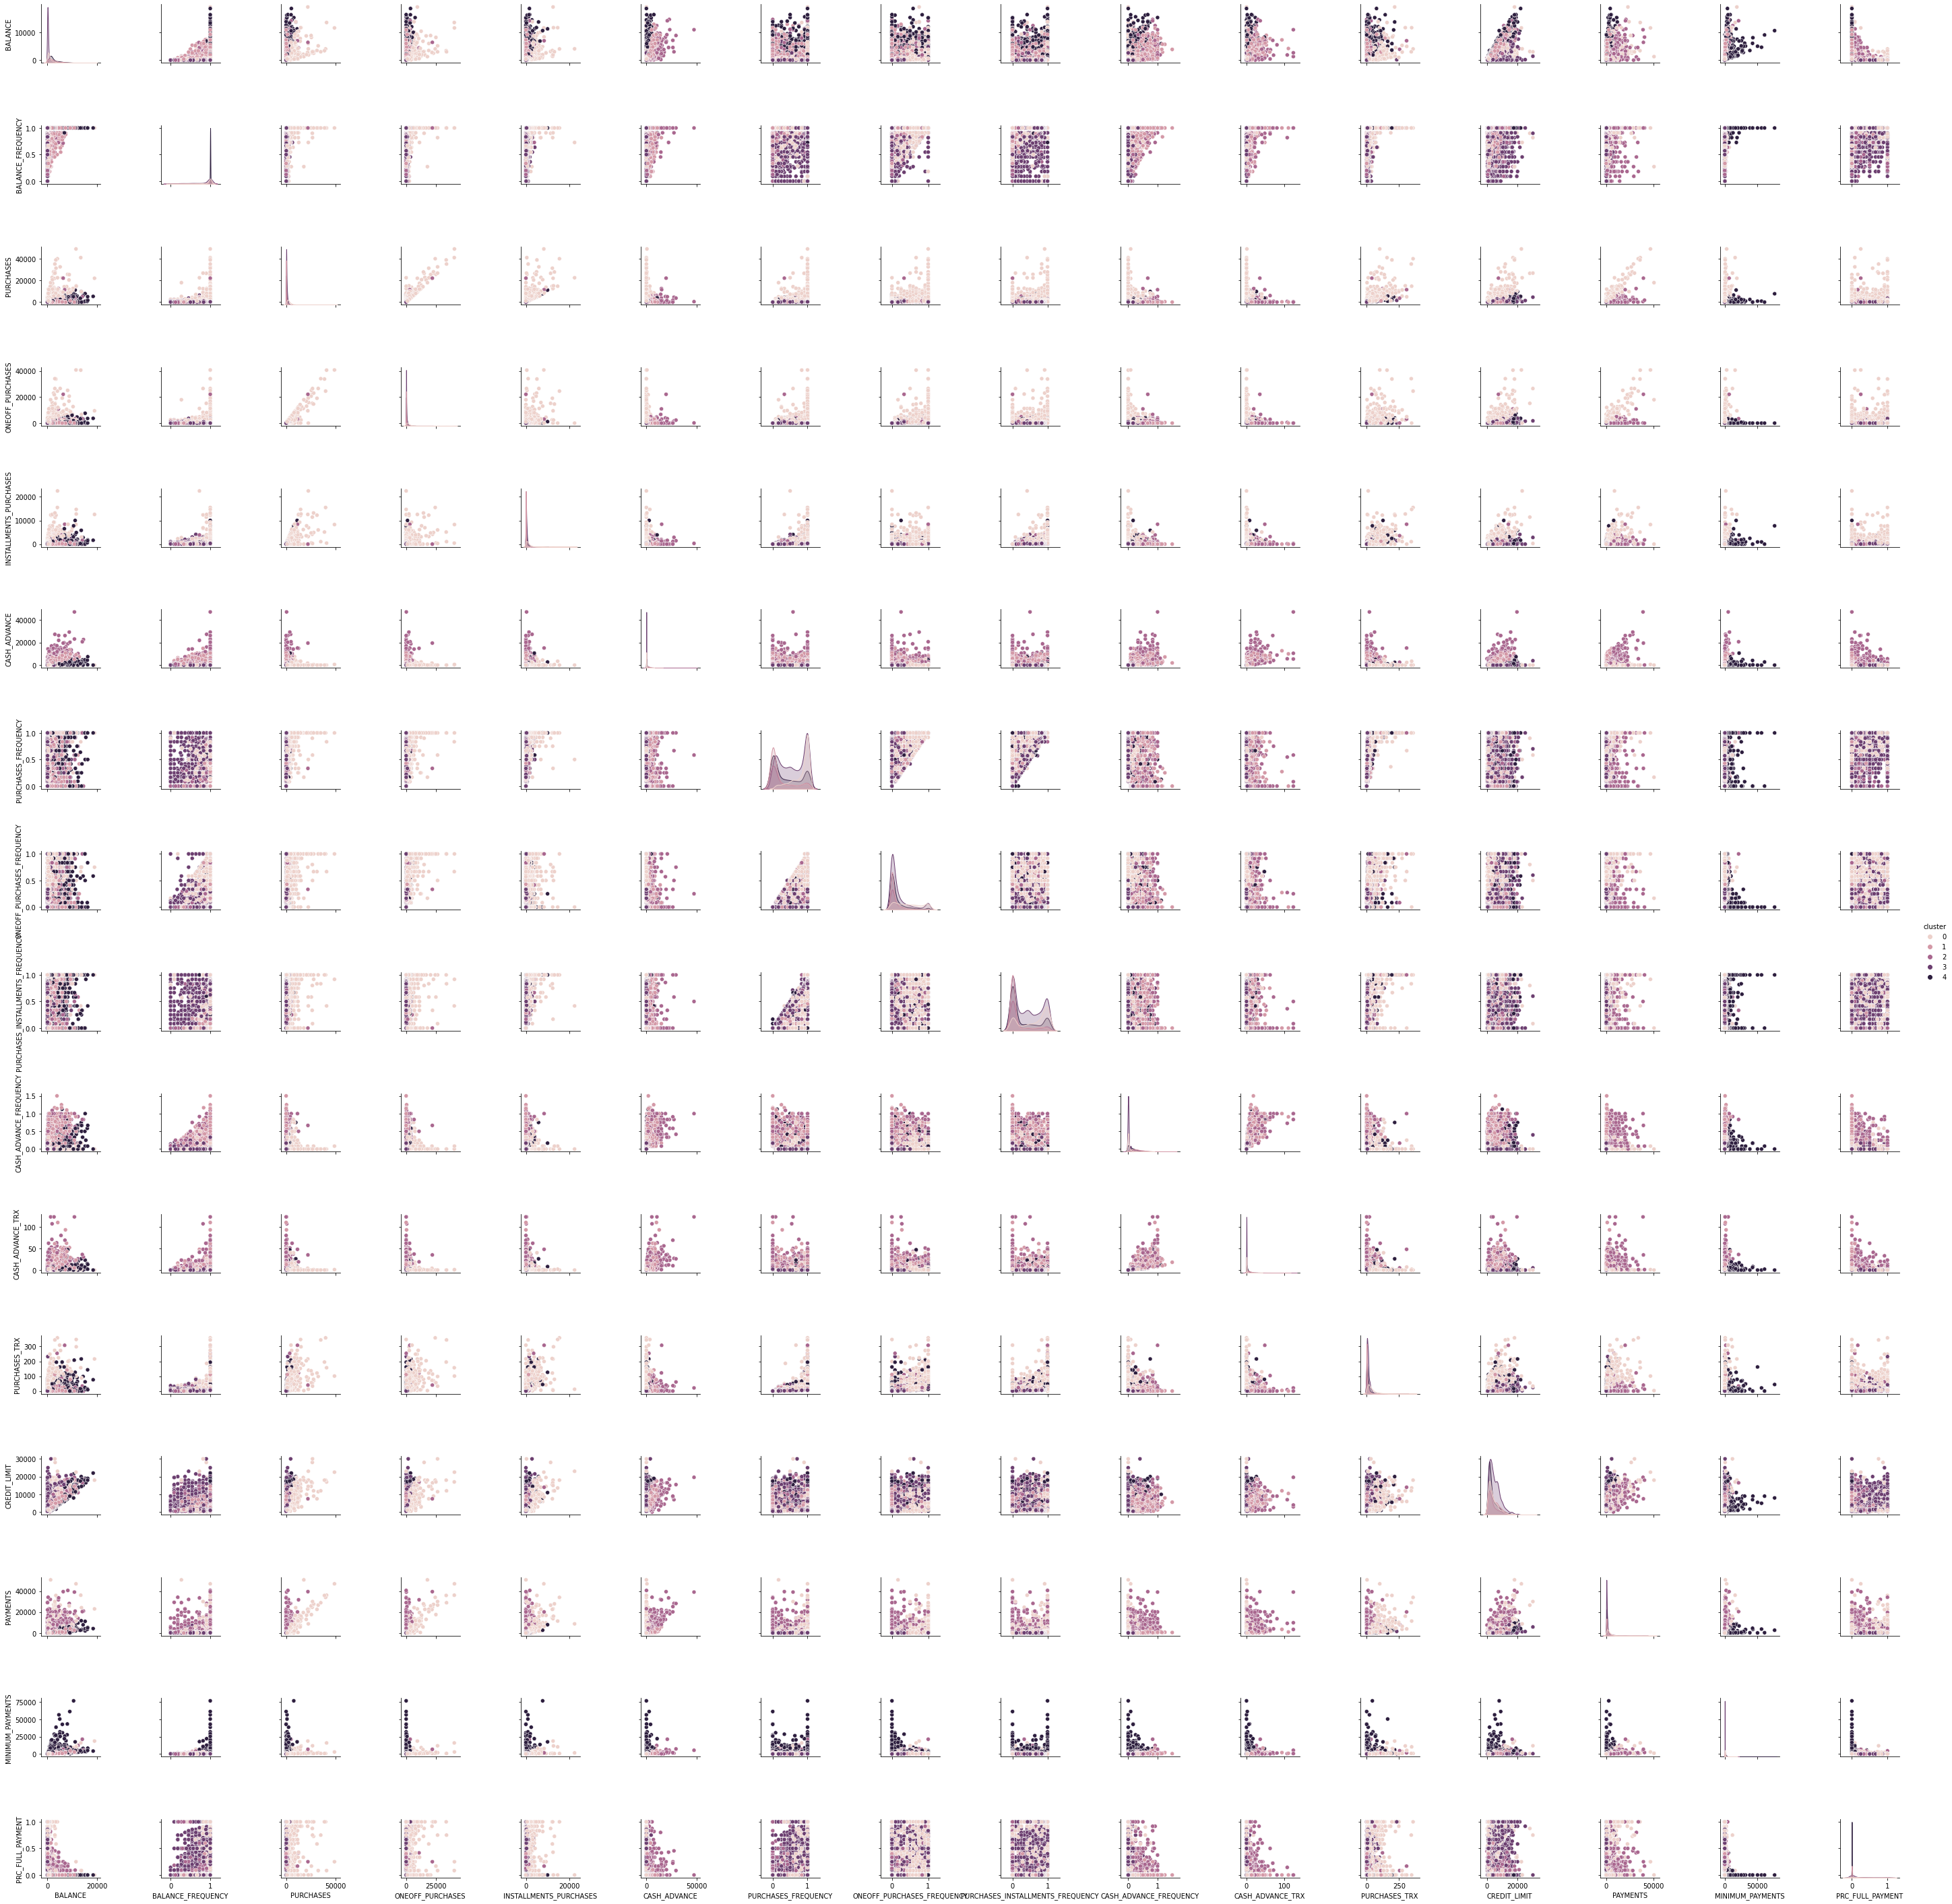

In [ ]:
sns.pairplot(dados[0:],hue='cluster') #Muitos gráficos que dificultam a análise 

#**Aula 8 - Entendendo os valores dos atributos no Cluster**

##**Descrevendo os atributos**

In [ ]:
dados.groupby('cluster').describe()

BALANCE                            ... PRC_FULL_PAYMENT                    
          count         mean          std  ...              50%       75%       max
cluster                                    ...                                     
0        1498.0  1117.171407  1625.342446  ...         0.083333  0.567461  1.000000
1        1315.0  2719.616192  2230.337145  ...         0.000000  0.000000  0.600000
2        1001.0  1748.854674  1987.975020  ...         0.083333  0.166667  1.000000
3        3311.0   488.867396   936.898299  ...         0.000000  0.436507  1.000000
4        1825.0  2949.582558  2565.494710  ...         0.000000  0.000000  0.416667

[5 rows x 128 columns]

##**Analisando os valores**

In [ ]:
centroides = kmeans.cluster_centers_
print(centroides)

[[1.55263566e-01 2.45567859e-04 4.44909827e-01 2.57480038e-01
  1.87602909e-01 2.66338231e-02 2.04977764e-04 8.81458334e-05
  1.52022197e-04 9.51547795e-06 1.73533555e-04 6.18686273e-03
  5.94714350e-01 4.02343515e-01 9.24068050e-02 7.27235416e-05]
 [3.92225952e-01 2.21961434e-04 4.08966140e-02 2.41375044e-02
  1.67632013e-02 4.69796685e-01 4.57220814e-05 1.60226742e-05
  3.02199798e-05 7.74424778e-05 1.73808813e-03 7.90301737e-04
  7.16380049e-01 1.49362355e-01 1.32273009e-01 2.04476303e-06]
 [2.27283461e-01 2.12919599e-04 6.90552841e-02 3.82103280e-02
  3.08505405e-02 3.64415621e-01 5.84848743e-05 2.24756747e-05
  3.97948056e-05 5.90776324e-05 1.43098394e-03 1.30916105e-03
  5.19057140e-01 6.31517578e-01 1.13827521e-01 3.10899781e-05]
 [7.41256976e-02 2.30562257e-04 1.22384952e-01 4.90559177e-02
  7.34297204e-02 2.02256210e-02 1.72049266e-04 3.40191371e-05
  1.39349370e-04 7.57499670e-06 1.18862126e-04 2.86787207e-03
  9.43224328e-01 1.54777074e-01 5.72195798e-02 7.55204087e-05]
 [5.

##**Selecionando os Atributos**

In [ ]:
max = len(centroides[0])

for i in range(max):
  print(dados.columns.values[i], "\n{:.4f}".format(centroides[:,i].var()))
#temos a variância para os atributos, agora selecionamos os que posseuem maiores

BALANCE 
0.0276
BALANCE_FREQUENCY 
0.0000
PURCHASES 
0.0218
ONEOFF_PURCHASES 
0.0077
INSTALLMENTS_PURCHASES 
0.0037
CASH_ADVANCE 
0.0351
PURCHASES_FREQUENCY 
0.0000
ONEOFF_PURCHASES_FREQUENCY 
0.0000
PURCHASES_INSTALLMENTS_FREQUENCY 
0.0000
CASH_ADVANCE_FREQUENCY 
0.0000
CASH_ADVANCE_TRX 
0.0000
PURCHASES_TRX 
0.0000
CREDIT_LIMIT 
0.0210
PAYMENTS 
0.0348
MINIMUM_PAYMENTS 
0.0078
PRC_FULL_PAYMENT 
0.0000


BALANCE 0.0276

PURCHASES 0.0218

CASH_ADVANCE 0.0351

CREDIT_LIMIT 0.0210

PAYMENTS 0.0348

##**Filtrando os valores**

In [ ]:
description = dados.groupby('cluster')['BALANCE', 'PURCHASES','CASH_ADVANCE','PAYMENTS',"CREDIT_LIMIT" ]
n_clients = description.size()
description = description.mean()
description['n_cliesnts'] = n_clients

description



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,BALANCE,PURCHASES,CASH_ADVANCE,PAYMENTS,CREDIT_LIMIT,n_cliesnts
cluster,,,,,,
0,1117.171407,3323.689626,185.514237,3045.848646,4043.598232,1498
1,2719.616192,251.530144,3004.448265,1008.915227,4782.091255,1315
2,1748.854674,531.250120,3064.439069,4961.223005,3914.956256,1001
3,488.867396,639.142794,126.249939,827.304607,5180.291987,3311
4,2949.582558,559.479945,573.495675,1050.324877,3730.000000,1825


#**Interpretando os Clusters**

In [ ]:
display(description)

,BALANCE,PURCHASES,CASH_ADVANCE,PAYMENTS,CREDIT_LIMIT,n_cliesnts
cluster,,,,,,
0,1117.171407,3323.689626,185.514237,3045.848646,4043.598232,1498
1,2719.616192,251.530144,3004.448265,1008.915227,4782.091255,1315
2,1748.854674,531.250120,3064.439069,4961.223005,3914.956256,1001
3,488.867396,639.142794,126.249939,827.304607,5180.291987,3311
4,2949.582558,559.479945,573.495675,1050.324877,3730.000000,1825


In [ ]:
dados.groupby('cluster')['PRC_FULL_PAYMENT'].describe() #para auxiliar na análise da métrica Payments

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,1498.0,0.282255,0.369040,0.0,0.0,0.083333,0.567461,1.000000
1,1315.0,0.007450,0.041141,0.0,0.0,0.000000,0.000000,0.600000
2,1001.0,0.129974,0.198876,0.0,0.0,0.083333,0.166667,1.000000
3,3311.0,0.244968,0.345935,0.0,0.0,0.000000,0.436507,1.000000
4,1825.0,0.001062,0.013400,0.0,0.0,0.000000,0.000000,0.416667


Não existe o certo ou errado. Mas foi passado um framework na aula.
Anotamos o que diferencia um cluster do outro.

**Balance**- o valor da fatura, de omprar realizadas
**Purchase** - Valor em compras
**Cash advance** - Valor de saque
**Payments** - Pagamentos
**Credit Limit** - Limite de Crédito
**PRC_FULL_PAYMENT** - Porcentagem de Pagamento da Fatura, para ser analisado em conjunto com Payments. maior são bons pagadores.


>**CLuster 0:** Cliente que usa o cartão de crédito para compras e pagamentos mas saca pouco dinheiro que é o que diferencia do cluster 2
>> Purchase: o maior valor em compras. Muito maior que os demais Clusteres, aprximadamente 5X do que o segundo maior.

>>PRC Média maior de pagamento

>>Payments:Segundo maior valor

>**CLuster 1:** Cliente que prefere dinheiro vivo, compra pouco e saca muito com o CC.
>> Purchase: o menor valor em compras

>> Cash Advance: segundo maior valor mas bem próximo do primeiro maior

>> Limite de Crédito: Segundo maior

>> PRC: segundo menor, Mals pagadores

>**CLuster 2:** Cliente que usa o CC para saques e realizar pagamentos e compra pouco no CC. Foco em saque, compra no $$, menor quantidade de clientes
>> Cash Advance: maior valor mas bem próximo do segundo maior

>> Payments: maior valor

>**CLuster 3:** Clientes que gastam pouco, não gastam muito com Cartão de , maior quantidade de Clientes

>>Balance: clientes com os menores valor de gastos

>>Cash advance: Menor valor

>> Limiite de Crédito: Maior

>>Payments: Menor valor

>> PRC: Segundo maior, bem próximo do primeiro

>**CLuster 4:** Clientes que gastam muito e pagam pouco, menor crédito
>>Balance: clientes com os maiores valor de gastos

>> Limite de crédito : o menor.

>> PRC: Menor Média, piores pagadores


##**Utilizando os CLusters**

- poderia aplicar uma estratégia de negócios com esses grupos, exemplo, o Cluster3: muitos clientes,bons pagadores mas gastam pouco no cartão. Criar uma estratégia para fazê-los gastar mais; poderia uma parceria de pontos etc..
- Cluster 0 é o que mais gastam e são os melhores pagadores mas o limite deles éo segundo maior, então um aumento do limite poderia ser uma estratégia a considerar.

Para saber se a estratégia funciona/ funcionou usamos o teste A|B.

Grupo de controle: sem alteração

Grupo de Teste: programa de pontos

Ao final de um período analisamos se gastaram mais e comparamos os gastos. 